In [2]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.impute import KNNImputer

In [2]:
xTrain = pd.read_csv('data/Xtrain.txt',sep = ' ', index_col = 'Id')

/Users/nelsontang/Desktop/module2/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.set_option('display.max_columns', None)
xTrain.head(10)

,A01,A02,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,C01,C02,C03,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,E01,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,G01,G02,G03
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.067006,2.000400,-0.181087,-0.026722,-0.478257,1.672440,-2.526620,-9.000000,-0.724482,-1.709480,2.187080,0.860115,0.435930,-0.294076,1.067530,1.439820,?,-0.919251,-1.996300,0.890578,0.149513,-1.160060,-0.682101,-0.713485,1.542960,1.299720,0.354335,0.234390,-0.093367,0.149074,-0.009785,-0.061023,0.031111,-0.522867,-0.289766,0.077959,0.102746,-0.274536,0.168048,-0.035412,0.068042,0.993830,0.862845,0.603155,0.088207,0.974599,0.178045,0.329594,0.606314,0,0,0,-1.334800,1.371420,0.052319,0.430223,0.146688,0.822720,1.539380,1,1,0
3,-0.238565,-1.755040,-0.562340,0.135810,-0.952346,NaN,-0.745675,-1.729910,1.159080,0.962413,-1.962020,0.178107,-0.019330,1.030860,-0.843428,-0.100388,-0.971939,-1.585190,0.318801,-0.667907,NaN,NaN,1.270770,-0.826329,-0.878540,0.407246,-0.172220,-0.050788,0.046577,0.012492,0.123941,-0.053053,0.001863,0.046846,-0.203506,-0.128933,0.076809,-0.049081,-0.046214,-0.123072,-0.900000,0.581592,0.647532,0.455346,0.875287,0.957243,0.568945,0.205302,0.412246,0,0,0,0.588824,-0.815730,0.130094,-0.326454,-0.827175,-0.456060,0.445250,0,0,1
4,-0.900302,0.760359,-0.566809,0.902949,NaN,-2.648990,1.090920,-1.496180,1.458000,-0.151557,NaN,-0.069429,NaN,0.341582,-0.974272,1.218820,1.49232,2.009810,1.736070,-1.863180,-0.927577,0.185668,-0.031869,-0.445829,0.790598,-0.377092,0.059968,0.055790,-0.079539,0.004292,-0.008391,0.000393,-0.038417,0.034492,0.011576,0.009757,0.014451,0.000554,-0.035512,0.067046,0.880008,0.758466,0.671026,0.853278,0.448052,0.843769,0.773529,0.831165,0.841522,0,0,0,-0.440171,-1.232990,1.458580,-1.373100,-0.550556,1.146150,-0.177612,0,0,1
5,0.448940,-0.530155,-0.723218,0.175458,0.350433,-1.143190,-0.024211,1.157120,-0.703945,-0.361253,1.116860,0.906481,0.459762,1.415540,-1.417520,1.311010,0.553186,0.118350,1.253730,-1.367460,NaN,-0.455266,-1.841490,0.869690,-0.019017,1.323400,-0.095152,0.020173,-0.008759,0.014734,0.098440,-0.013698,0.136298,0.029402,-0.068004,-0.055424,0.112318,-0.043323,0.049469,-0.013996,1.032700,0.424483,0.421215,0.814396,0.559297,0.687068,0.939611,0.823171,0.320116,0,0,0,-2.101000,1.384520,0.527246,0.800052,-0.126167,-0.719873,-0.906641,1,1,0
7,-0.096147,0.123017,-0.269223,-0.041637,-0.198871,0.206065,-0.289754,1.130150,1.215680,0.222229,2.340990,NaN,2.803530,0.266259,-0.246009,-0.642589,NaN,-0.556802,1.606080,-0.636420,-0.817540,-0.674955,1.483620,-1.489480,0.915046,-0.520752,0.030626,0.086274,0.029644,-0.026141,-0.016937,0.034814,-0.024126,-0.076092,-0.033389,-0.027681,0.104344,-0.040200,0.047757,0.025712,-0.264000,0.773113,0.691213,0.944098,0.989248,0.001787,0.203836,0.013136,0.825592,0,0,0,-0.154242,1.074310,-0.959487,1.102720,0.437843,-0.028178,-1.122100,0,1,0
8,1.056620,0.213196,-0.693066,-0.118105,1.506680,0.336046,1.109640,0.871978,-1.435880,NaN,1.067160,-1.312350,1.096720,-1.036440,NaN,1.101110,NaN,3.354420,-1.640130,-0.089543,0.040560,NaN,-1.856840,-0.671240,-0.849987,-1.874950,-0.025685,-0.140360,0.047699,0.051178,0.039522,-0.065722,0.143482,-0.058526,-0.138168,-0.089980,0.050557,-0.021542,-0.018810,-0.076566,0.273549,0.270450,0.846584,0.634835,0.659574,0.213167,0.307667,0.963503,0.041824,0,0,0,-1.958050,0.507023,-0.700710,-0.089486,0.191197,-1.399240,0.909921,1,1,0
10,-1.633000,-0.952423,0.930030,0.305183,1.726590,0.038630,-0.160338,-1.027170,-0.376549,-1.180100,-0.831087,0.103919,1.000220,-1.298910,1.313190,-0.892809,-1.46912,0.289340,0.192359,-1.124030,0.889574,-0.726090,-0.735076,-0.404705,0.686351,-0.052320,-0.000799,0.053632,-0.011351,0.091718,0.030502,0.021809,-0.071906,0.062245,-0.018105,0.079853,-0.044693,0.038134,0.044929,0.026286,0.666274,0.445502,0.369840,0.552540,0.878958,0.298453,0.995877,0.425272,0.755493,0,0,0,-1.347620,-0.187898,0.048151,-0.293902,-

In [5]:
#missing values are in group B01 to B22
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153287 entries, 2 to 177730
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A01     153287 non-null  float64
 1   A02     153287 non-null  float64
 2   B01     137969 non-null  float64
 3   B02     138243 non-null  float64
 4   B03     137922 non-null  float64
 5   B04     137940 non-null  float64
 6   B05     138059 non-null  float64
 7   B06     137917 non-null  float64
 8   B07     137968 non-null  float64
 9   B08     138398 non-null  float64
 10  B09     138136 non-null  float64
 11  B10     138095 non-null  float64
 12  B11     137947 non-null  float64
 13  B12     137962 non-null  float64
 14  B13     138242 non-null  float64
 15  B14     137965 non-null  float64
 16  B15     137822 non-null  object 
 17  B16     137991 non-null  float64
 18  B17     138024 non-null  float64
 19  B18     138025 non-null  float64
 20  B19     137940 non-null  float64
 21  B20     13

We can see there have many missing values in group B and B15 we need to convert it to float.

In [6]:
xTrain.describe()

,A01,A02,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B16,B17,B18,B19,B20,B21,B22,B23,B24,C01,C02,C03,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,E01,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,G01,G02,G03
count,153287.000000,153287.000000,137969.000000,138243.000000,137922.000000,137940.000000,138059.000000,137917.000000,137968.000000,138398.000000,138136.000000,138095.000000,137947.000000,137962.000000,138242.000000,137965.000000,137991.000000,138024.000000,138025.000000,137940.000000,137854.000000,137946.000000,137731.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,1.532870e+05,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000,153287.000000
mean,-0.028971,-0.032556,-0.034778,-0.033728,-0.032618,-0.030758,-0.030858,-0.032354,-0.037061,-0.034525,0.005473,0.006305,0.011816,0.009572,0.006545,0.007081,0.009372,0.009831,0.022691,0.008419,0.006790,0.020167,0.005260,0.004825,0.004657,0.014654,0.009951,0.009649,0.041729,0.032892,-0.018985,0.057223,-0.078087,-0.084266,0.006106,0.043249,-0.032568,0.040481,-0.021371,0.005098,0.507463,0.507754,0.505964,0.506710,5.060091e-01,0.506016,0.505472,0.506246,0.007509,0.006191,0.006615,0.005490,0.006943,0.006750,0.008329,0.007377,0.006225,0.007802,0.507701,0.506377,0.508719
std,1.164992,1.177522,1.195005,1.186061,1.179343,1.179383,1.179375,1.193100,1.191588,1.198386,1.024539,1.024592,1.026180,1.027420,1.024113,1.022967,1.026683,1.024321,1.006766,1.025442,1.023003,1.003978,1.026598,1.021567,1.019304,0.238884,0.236614,0.223204,0.223238,0.225379,0.225888,0.230531,0.241652,0.243859,0.223230,0.223891,0.229106,0.224002,0.224274,1.020392,0.351421,0.351068,0.351404,0.351947,3.513753e-01,0.351132,0.351854,0.351537,0.671149,0.671697,0.661628,1.021900,1.022421,1.022060,1.022312,1.022133,1.023551,1.021516,0.538466,0.538484,0.538451
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-4.486950,-4.290760,-4.820700,-4.384280,-4.483640,-4.771130,-4.843360,-4.062860,-2.000000,-5.040890,-4.666040,-2.000000,-4.584800,-4.316970,-4.310820,-0.461537,-0.475818,-0.289915,-0.207963,-0.241886,-0.339680,-0.243994,-0.656352,-0.726827,-0.251796,-0.234125,-0.452780,-0.240595,-0.306154,-5.123140,0.000014,0.000009,0.000025,0.000005,1.603810e-07,0.000002,0.000010,0.000002,-7.000000,-7.000000,-7.000000,-3.206740,-2.846240,-3.313700,-2.891410,-2.084870,-1.660690,-4.326530,0.000000,0.000000,0.000000
25%,-0.684109,-0.684667,-0.682869,-0.687350,-0.683726,-0.688468,-0.683333,-0.685994,-0.685191,-0.684253,-0.675956,-0.676340,-0.670527,-0.670177,-0.674422,-0.674364,-0.671129,-0.670881,-0.665699,-0.670247,-0.671406,-0.665107,-0.675174,-0.677541,-0.672370,-0.057842,-0.058340,-0.035410,-0.006257,-0.019660,-0.065719,-0.007062,-0.142688,-0.151897,-0.038471,-0.006369,-0.083209,-0.009225,-0.066064,-0.678705,0.251444,0.252507,0.248885,0.249455,2.504730e-01,0.250560,0.248747,0.250012,0.000000,0.000000,0.000000,-0.784075,-0.819883,-0.782516,-0.812457,-0.851934,-0.839630,-0.813149,0.000000,0.000000,0.000000
50%,-0.003500,-0.005173,-0.007289,-0.007513,-0.005543,-0.004054,-0.006289,-0.001324,-0.005293,-0.005902,-0.000638,-0.000462,0.004082,0.004221,0.001367,0.001641,0.003417,0.004272,0.008542,0.003279,0.002411,0.007199,0.000023,-0.000861,-0.001271,0.006308,0.002376,0.002704,0.033486,0.022988,-0.022908,0.042556,-0.073542,-0.079016,-0.000472,0.034244,-0.034257,0.031783,-0.026970,0.000000,0.501460,0.503810,0.500252,0.500696,4.999950e-01,0.499207,0.498685,0.500044,0.000000,0.000000,0.000000,0.003298,0.001531,-0.001113,0.005887,0.002750,-0.022363,-0.000344,1.

<AxesSubplot:>

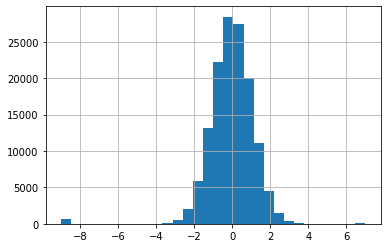

In [7]:
xTrain['B01'].hist(bins=30)

<AxesSubplot:>

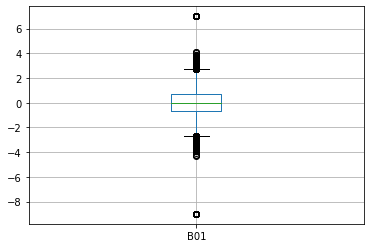

In [8]:
xTrain.boxplot(column=[ 'B01'])

In [9]:
#convert '?' to NaN
xTrain = xTrain.replace('?', np.nan)
xTrain.head(10)

,A01,A02,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,C01,C02,C03,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,E01,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,G01,G02,G03
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.067006,2.000400,-0.181087,-0.026722,-0.478257,1.672440,-2.526620,-9.000000,-0.724482,-1.709480,2.187080,0.860115,0.435930,-0.294076,1.067530,1.439820,NaN,-0.919251,-1.996300,0.890578,0.149513,-1.160060,-0.682101,-0.713485,1.542960,1.299720,0.354335,0.234390,-0.093367,0.149074,-0.009785,-0.061023,0.031111,-0.522867,-0.289766,0.077959,0.102746,-0.274536,0.168048,-0.035412,0.068042,0.993830,0.862845,0.603155,0.088207,0.974599,0.178045,0.329594,0.606314,0,0,0,-1.334800,1.371420,0.052319,0.430223,0.146688,0.822720,1.539380,1,1,0
3,-0.238565,-1.755040,-0.562340,0.135810,-0.952346,NaN,-0.745675,-1.729910,1.159080,0.962413,-1.962020,0.178107,-0.019330,1.030860,-0.843428,-0.100388,-0.971939,-1.585190,0.318801,-0.667907,NaN,NaN,1.270770,-0.826329,-0.878540,0.407246,-0.172220,-0.050788,0.046577,0.012492,0.123941,-0.053053,0.001863,0.046846,-0.203506,-0.128933,0.076809,-0.049081,-0.046214,-0.123072,-0.900000,0.581592,0.647532,0.455346,0.875287,0.957243,0.568945,0.205302,0.412246,0,0,0,0.588824,-0.815730,0.130094,-0.326454,-0.827175,-0.456060,0.445250,0,0,1
4,-0.900302,0.760359,-0.566809,0.902949,NaN,-2.648990,1.090920,-1.496180,1.458000,-0.151557,NaN,-0.069429,NaN,0.341582,-0.974272,1.218820,1.49232,2.009810,1.736070,-1.863180,-0.927577,0.185668,-0.031869,-0.445829,0.790598,-0.377092,0.059968,0.055790,-0.079539,0.004292,-0.008391,0.000393,-0.038417,0.034492,0.011576,0.009757,0.014451,0.000554,-0.035512,0.067046,0.880008,0.758466,0.671026,0.853278,0.448052,0.843769,0.773529,0.831165,0.841522,0,0,0,-0.440171,-1.232990,1.458580,-1.373100,-0.550556,1.146150,-0.177612,0,0,1
5,0.448940,-0.530155,-0.723218,0.175458,0.350433,-1.143190,-0.024211,1.157120,-0.703945,-0.361253,1.116860,0.906481,0.459762,1.415540,-1.417520,1.311010,0.553186,0.118350,1.253730,-1.367460,NaN,-0.455266,-1.841490,0.869690,-0.019017,1.323400,-0.095152,0.020173,-0.008759,0.014734,0.098440,-0.013698,0.136298,0.029402,-0.068004,-0.055424,0.112318,-0.043323,0.049469,-0.013996,1.032700,0.424483,0.421215,0.814396,0.559297,0.687068,0.939611,0.823171,0.320116,0,0,0,-2.101000,1.384520,0.527246,0.800052,-0.126167,-0.719873,-0.906641,1,1,0
7,-0.096147,0.123017,-0.269223,-0.041637,-0.198871,0.206065,-0.289754,1.130150,1.215680,0.222229,2.340990,NaN,2.803530,0.266259,-0.246009,-0.642589,NaN,-0.556802,1.606080,-0.636420,-0.817540,-0.674955,1.483620,-1.489480,0.915046,-0.520752,0.030626,0.086274,0.029644,-0.026141,-0.016937,0.034814,-0.024126,-0.076092,-0.033389,-0.027681,0.104344,-0.040200,0.047757,0.025712,-0.264000,0.773113,0.691213,0.944098,0.989248,0.001787,0.203836,0.013136,0.825592,0,0,0,-0.154242,1.074310,-0.959487,1.102720,0.437843,-0.028178,-1.122100,0,1,0
8,1.056620,0.213196,-0.693066,-0.118105,1.506680,0.336046,1.109640,0.871978,-1.435880,NaN,1.067160,-1.312350,1.096720,-1.036440,NaN,1.101110,NaN,3.354420,-1.640130,-0.089543,0.040560,NaN,-1.856840,-0.671240,-0.849987,-1.874950,-0.025685,-0.140360,0.047699,0.051178,0.039522,-0.065722,0.143482,-0.058526,-0.138168,-0.089980,0.050557,-0.021542,-0.018810,-0.076566,0.273549,0.270450,0.846584,0.634835,0.659574,0.213167,0.307667,0.963503,0.041824,0,0,0,-1.958050,0.507023,-0.700710,-0.089486,0.191197,-1.399240,0.909921,1,1,0
10,-1.633000,-0.952423,0.930030,0.305183,1.726590,0.038630,-0.160338,-1.027170,-0.376549,-1.180100,-0.831087,0.103919,1.000220,-1.298910,1.313190,-0.892809,-1.46912,0.289340,0.192359,-1.124030,0.889574,-0.726090,-0.735076,-0.404705,0.686351,-0.052320,-0.000799,0.053632,-0.011351,0.091718,0.030502,0.021809,-0.071906,0.062245,-0.018105,0.079853,-0.044693,0.038134,0.044929,0.026286,0.666274,0.445502,0.369840,0.552540,0.878958,0.298453,0.995877,0.425272,0.755493,0,0,0,-1.347620,-0.187898,0.048151,-0.293902

In [10]:
#convert object to float
xTrain["B15"] = xTrain["B15"].astype(float)
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153287 entries, 2 to 177730
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A01     153287 non-null  float64
 1   A02     153287 non-null  float64
 2   B01     137969 non-null  float64
 3   B02     138243 non-null  float64
 4   B03     137922 non-null  float64
 5   B04     137940 non-null  float64
 6   B05     138059 non-null  float64
 7   B06     137917 non-null  float64
 8   B07     137968 non-null  float64
 9   B08     138398 non-null  float64
 10  B09     138136 non-null  float64
 11  B10     138095 non-null  float64
 12  B11     137947 non-null  float64
 13  B12     137962 non-null  float64
 14  B13     138242 non-null  float64
 15  B14     137965 non-null  float64
 16  B15     137821 non-null  float64
 17  B16     137991 non-null  float64
 18  B17     138024 non-null  float64
 19  B18     138025 non-null  float64
 20  B19     137940 non-null  float64
 21  B20     13

In [16]:
#reference: https://scikit-learn.org/stable/modules/impute.html
imputer = KNNImputer(n_neighbors=391, weights="uniform")
imputed_xTrain = imputer.fit_transform(xTrain)
imputed_xTrain

array([[-0.0670058 ,  2.0004    , -0.181087  , ...,  1.        ,
         1.        ,  0.        ],
       [-0.238565  , -1.75504   , -0.56234   , ...,  0.        ,
         0.        ,  1.        ],
       [-0.900302  ,  0.760359  , -0.566809  , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.454239  ,  1.05911   , -0.10666129, ...,  1.        ,
         1.        ,  1.        ],
       [-0.336121  ,  0.218963  ,  0.985771  , ...,  1.        ,
         0.        ,  1.        ],
       [-0.202946  ,  0.00444911, -0.403091  , ...,  0.        ,
         1.        ,  1.        ]])

In [85]:
newxTrain = pd.DataFrame(imputed_xTrain,columns = list(xTrain.columns),index = xTrain.index)
#newxTrain.to_csv('imputed_data/imputed_Xtrain.csv')

In [87]:
xTrain.head(10)

,A01,A02,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,C01,C02,C03,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,E01,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,G01,G02,G03
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.067006,2.000400,-0.181087,-0.026722,-0.478257,1.672440,-2.526620,-9.000000,-0.724482,-1.709480,2.187080,0.860115,0.435930,-0.294076,1.067530,1.439820,NaN,-0.919251,-1.996300,0.890578,0.149513,-1.160060,-0.682101,-0.713485,1.542960,1.299720,0.354335,0.234390,-0.093367,0.149074,-0.009785,-0.061023,0.031111,-0.522867,-0.289766,0.077959,0.102746,-0.274536,0.168048,-0.035412,0.068042,0.993830,0.862845,0.603155,0.088207,0.974599,0.178045,0.329594,0.606314,0,0,0,-1.334800,1.371420,0.052319,0.430223,0.146688,0.822720,1.539380,1,1,0
3,-0.238565,-1.755040,-0.562340,0.135810,-0.952346,NaN,-0.745675,-1.729910,1.159080,0.962413,-1.962020,0.178107,-0.019330,1.030860,-0.843428,-0.100388,-0.971939,-1.585190,0.318801,-0.667907,NaN,NaN,1.270770,-0.826329,-0.878540,0.407246,-0.172220,-0.050788,0.046577,0.012492,0.123941,-0.053053,0.001863,0.046846,-0.203506,-0.128933,0.076809,-0.049081,-0.046214,-0.123072,-0.900000,0.581592,0.647532,0.455346,0.875287,0.957243,0.568945,0.205302,0.412246,0,0,0,0.588824,-0.815730,0.130094,-0.326454,-0.827175,-0.456060,0.445250,0,0,1
4,-0.900302,0.760359,-0.566809,0.902949,NaN,-2.648990,1.090920,-1.496180,1.458000,-0.151557,NaN,-0.069429,NaN,0.341582,-0.974272,1.218820,1.492320,2.009810,1.736070,-1.863180,-0.927577,0.185668,-0.031869,-0.445829,0.790598,-0.377092,0.059968,0.055790,-0.079539,0.004292,-0.008391,0.000393,-0.038417,0.034492,0.011576,0.009757,0.014451,0.000554,-0.035512,0.067046,0.880008,0.758466,0.671026,0.853278,0.448052,0.843769,0.773529,0.831165,0.841522,0,0,0,-0.440171,-1.232990,1.458580,-1.373100,-0.550556,1.146150,-0.177612,0,0,1
5,0.448940,-0.530155,-0.723218,0.175458,0.350433,-1.143190,-0.024211,1.157120,-0.703945,-0.361253,1.116860,0.906481,0.459762,1.415540,-1.417520,1.311010,0.553186,0.118350,1.253730,-1.367460,NaN,-0.455266,-1.841490,0.869690,-0.019017,1.323400,-0.095152,0.020173,-0.008759,0.014734,0.098440,-0.013698,0.136298,0.029402,-0.068004,-0.055424,0.112318,-0.043323,0.049469,-0.013996,1.032700,0.424483,0.421215,0.814396,0.559297,0.687068,0.939611,0.823171,0.320116,0,0,0,-2.101000,1.384520,0.527246,0.800052,-0.126167,-0.719873,-0.906641,1,1,0
7,-0.096147,0.123017,-0.269223,-0.041637,-0.198871,0.206065,-0.289754,1.130150,1.215680,0.222229,2.340990,NaN,2.803530,0.266259,-0.246009,-0.642589,NaN,-0.556802,1.606080,-0.636420,-0.817540,-0.674955,1.483620,-1.489480,0.915046,-0.520752,0.030626,0.086274,0.029644,-0.026141,-0.016937,0.034814,-0.024126,-0.076092,-0.033389,-0.027681,0.104344,-0.040200,0.047757,0.025712,-0.264000,0.773113,0.691213,0.944098,0.989248,0.001787,0.203836,0.013136,0.825592,0,0,0,-0.154242,1.074310,-0.959487,1.102720,0.437843,-0.028178,-1.122100,0,1,0
8,1.056620,0.213196,-0.693066,-0.118105,1.506680,0.336046,1.109640,0.871978,-1.435880,NaN,1.067160,-1.312350,1.096720,-1.036440,NaN,1.101110,NaN,3.354420,-1.640130,-0.089543,0.040560,NaN,-1.856840,-0.671240,-0.849987,-1.874950,-0.025685,-0.140360,0.047699,0.051178,0.039522,-0.065722,0.143482,-0.058526,-0.138168,-0.089980,0.050557,-0.021542,-0.018810,-0.076566,0.273549,0.270450,0.846584,0.634835,0.659574,0.213167,0.307667,0.963503,0.041824,0,0,0,-1.958050,0.507023,-0.700710,-0.089486,0.191197,-1.399240,0.909921,1,1,0
10,-1.633000,-0.952423,0.930030,0.305183,1.726590,0.038630,-0.160338,-1.027170,-0.376549,-1.180100,-0.831087,0.103919,1.000220,-1.298910,1.313190,-0.892809,-1.469120,0.289340,0.192359,-1.124030,0.889574,-0.726090,-0.735076,-0.404705,0.686351,-0.052320,-0.000799,0.053632,-0.011351,0.091718,0.030502,0.021809,-0.071906,0.062245,-0.018105,0.079853,-0.044693,0.038134,0.044929,0.026286,0.666274,0.445502,0.369840,0.552540,0.878958,0.298453,0.995877,0.425272,0.755493,0,0,0,-1.347620,-0.187898,0.048151,-0.2939

In [86]:
newxTrain.head(10)

,A01,A02,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,C01,C02,C03,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,E01,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,G01,G02,G03
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.067006,2.000400,-0.181087,-0.026722,-0.478257,1.672440,-2.526620,-9.000000,-0.724482,-1.709480,2.187080,0.860115,0.435930,-0.294076,1.067530,1.439820,-0.026564,-0.919251,-1.996300,0.890578,0.149513,-1.160060,-0.682101,-0.713485,1.542960,1.299720,0.354335,0.234390,-0.093367,0.149074,-0.009785,-0.061023,0.031111,-0.522867,-0.289766,0.077959,0.102746,-0.274536,0.168048,-0.035412,0.068042,0.993830,0.862845,0.603155,0.088207,0.974599,0.178045,0.329594,0.606314,0.0,0.0,0.0,-1.334800,1.371420,0.052319,0.430223,0.146688,0.822720,1.539380,1.0,1.0,0.0
3,-0.238565,-1.755040,-0.562340,0.135810,-0.952346,-0.117586,-0.745675,-1.729910,1.159080,0.962413,-1.962020,0.178107,-0.019330,1.030860,-0.843428,-0.100388,-0.971939,-1.585190,0.318801,-0.667907,0.117452,0.021819,1.270770,-0.826329,-0.878540,0.407246,-0.172220,-0.050788,0.046577,0.012492,0.123941,-0.053053,0.001863,0.046846,-0.203506,-0.128933,0.076809,-0.049081,-0.046214,-0.123072,-0.900000,0.581592,0.647532,0.455346,0.875287,0.957243,0.568945,0.205302,0.412246,0.0,0.0,0.0,0.588824,-0.815730,0.130094,-0.326454,-0.827175,-0.456060,0.445250,0.0,0.0,1.0
4,-0.900302,0.760359,-0.566809,0.902949,-0.078431,-2.648990,1.090920,-1.496180,1.458000,-0.151557,0.018358,-0.069429,0.047583,0.341582,-0.974272,1.218820,1.492320,2.009810,1.736070,-1.863180,-0.927577,0.185668,-0.031869,-0.445829,0.790598,-0.377092,0.059968,0.055790,-0.079539,0.004292,-0.008391,0.000393,-0.038417,0.034492,0.011576,0.009757,0.014451,0.000554,-0.035512,0.067046,0.880008,0.758466,0.671026,0.853278,0.448052,0.843769,0.773529,0.831165,0.841522,0.0,0.0,0.0,-0.440171,-1.232990,1.458580,-1.373100,-0.550556,1.146150,-0.177612,0.0,0.0,1.0
5,0.448940,-0.530155,-0.723218,0.175458,0.350433,-1.143190,-0.024211,1.157120,-0.703945,-0.361253,1.116860,0.906481,0.459762,1.415540,-1.417520,1.311010,0.553186,0.118350,1.253730,-1.367460,0.032541,-0.455266,-1.841490,0.869690,-0.019017,1.323400,-0.095152,0.020173,-0.008759,0.014734,0.098440,-0.013698,0.136298,0.029402,-0.068004,-0.055424,0.112318,-0.043323,0.049469,-0.013996,1.032700,0.424483,0.421215,0.814396,0.559297,0.687068,0.939611,0.823171,0.320116,0.0,0.0,0.0,-2.101000,1.384520,0.527246,0.800052,-0.126167,-0.719873,-0.906641,1.0,1.0,0.0
7,-0.096147,0.123017,-0.269223,-0.041637,-0.198871,0.206065,-0.289754,1.130150,1.215680,0.222229,2.340990,-0.046250,2.803530,0.266259,-0.246009,-0.642589,0.007793,-0.556802,1.606080,-0.636420,-0.817540,-0.674955,1.483620,-1.489480,0.915046,-0.520752,0.030626,0.086274,0.029644,-0.026141,-0.016937,0.034814,-0.024126,-0.076092,-0.033389,-0.027681,0.104344,-0.040200,0.047757,0.025712,-0.264000,0.773113,0.691213,0.944098,0.989248,0.001787,0.203836,0.013136,0.825592,0.0,0.0,0.0,-0.154242,1.074310,-0.959487,1.102720,0.437843,-0.028178,-1.122100,0.0,1.0,0.0
8,1.056620,0.213196,-0.693066,-0.118105,1.506680,0.336046,1.109640,0.871978,-1.435880,-0.049924,1.067160,-1.312350,1.096720,-1.036440,-0.027471,1.101110,-0.019683,3.354420,-1.640130,-0.089543,0.040560,-0.009995,-1.856840,-0.671240,-0.849987,-1.874950,-0.025685,-0.140360,0.047699,0.051178,0.039522,-0.065722,0.143482,-0.058526,-0.138168,-0.089980,0.050557,-0.021542,-0.018810,-0.076566,0.273549,0.270450,0.846584,0.634835,0.659574,0.213167,0.307667,0.963503,0.041824,0.0,0.0,0.0,-1.958050,0.507023,-0.700710,-0.089486,0.191197,-1.399240,0.909921,1.0,1.0,0.0
10,-1.633000,-0.952423,0.930030,0.305183,1.726590,0.038630,-0.160338,-1.027170,-0.376549,-1.180100,-0.831087,0.103919,1.000220,-1.298910,1.313190,-0.892809,-1.469120,0.289340,0.192359,-1.124030,0.889574,-0.726090,-0.735076,-0.404705,0.686351,-0.052320,-0.000799,0.053632,-0.011351,0.091718,0.030502,0.021809,-0.071906,0.062245,-0.018105,0.079853,-0.044693,

In [88]:
newxTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153287 entries, 2 to 177730
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A01     153287 non-null  float64
 1   A02     153287 non-null  float64
 2   B01     153287 non-null  float64
 3   B02     153287 non-null  float64
 4   B03     153287 non-null  float64
 5   B04     153287 non-null  float64
 6   B05     153287 non-null  float64
 7   B06     153287 non-null  float64
 8   B07     153287 non-null  float64
 9   B08     153287 non-null  float64
 10  B09     153287 non-null  float64
 11  B10     153287 non-null  float64
 12  B11     153287 non-null  float64
 13  B12     153287 non-null  float64
 14  B13     153287 non-null  float64
 15  B14     153287 non-null  float64
 16  B15     153287 non-null  float64
 17  B16     153287 non-null  float64
 18  B17     153287 non-null  float64
 19  B18     153287 non-null  float64
 20  B19     153287 non-null  float64
 21  B20     15

In [89]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [90]:
for i in newxTrain.columns:
    if i in ['F03','F04','F05']:
            continue
    newxTrain[i] = remove_outlier(newxTrain,i)

In [91]:
newxTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153287 entries, 2 to 177730
Data columns (total 62 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A01     151523 non-null  float64
 1   A02     150840 non-null  float64
 2   B01     148357 non-null  float64
 3   B02     148477 non-null  float64
 4   B03     148513 non-null  float64
 5   B04     148596 non-null  float64
 6   B05     148578 non-null  float64
 7   B06     148600 non-null  float64
 8   B07     148511 non-null  float64
 9   B08     148474 non-null  float64
 10  B09     149104 non-null  float64
 11  B10     149163 non-null  float64
 12  B11     149070 non-null  float64
 13  B12     149075 non-null  float64
 14  B13     149035 non-null  float64
 15  B14     149127 non-null  float64
 16  B15     149051 non-null  float64
 17  B16     149022 non-null  float64
 18  B17     149018 non-null  float64
 19  B18     150287 non-null  float64
 20  B19     148942 non-null  float64
 21  B20     14

In [92]:
newxTrain.head(10)

,A01,A02,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,C01,C02,C03,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,E01,F01,F02,F03,F04,F05,F06,F07,F08,F09,F10,F11,F12,G01,G02,G03
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,NaN,NaN,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,NaN,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,NaN,-0.067006,-0.067006,-0.067006,NaN,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,0.0,0.0,0.0,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006,-0.067006
3,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,0.0,0.0,0.0,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565,-0.238565
4,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,NaN,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,0.0,0.0,0.0,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302,-0.900302
5,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.0,0.0,0.0,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940,0.448940
7,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,NaN,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,0.0,0.0,0.0,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147,-0.096147
8,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,NaN,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,0.0,0.0,0.0,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620,1.056620
10,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.633000,-1.6

In [95]:
cleaned_xTrain = newxTrain.dropna()

In [97]:
cleaned_xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89825 entries, 3 to 177730
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A01     89825 non-null  float64
 1   A02     89825 non-null  float64
 2   B01     89825 non-null  float64
 3   B02     89825 non-null  float64
 4   B03     89825 non-null  float64
 5   B04     89825 non-null  float64
 6   B05     89825 non-null  float64
 7   B06     89825 non-null  float64
 8   B07     89825 non-null  float64
 9   B08     89825 non-null  float64
 10  B09     89825 non-null  float64
 11  B10     89825 non-null  float64
 12  B11     89825 non-null  float64
 13  B12     89825 non-null  float64
 14  B13     89825 non-null  float64
 15  B14     89825 non-null  float64
 16  B15     89825 non-null  float64
 17  B16     89825 non-null  float64
 18  B17     89825 non-null  float64
 19  B18     89825 non-null  float64
 20  B19     89825 non-null  float64
 21  B20     89825 non-null  float64
 2